In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from funkwpap import *
import sympy as sp, pandas as pd, numpy as np, tqdm, time, sys, matplotlib.pyplot as plt, tqdm
from statistics import mean
from scipy.optimize import fsolve
from random import random


In [2]:
x = sp.symbols('x')
cap = 2000 # total emission cap
Regulator25 = Regulator("test1", permit_price = 2.4079, emission_cap = cap)
sector1 = Sector('cement', price_demand_function= 100 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator25)
sector2 = Sector('steel', price_demand_function=150 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator25)
sector3 = Sector('paper', price_demand_function= 200 - 0.02*x**1.5, free_emission_multiplier= 0, regulator= Regulator25)
country1 = Country('DE', 1, regulator= Regulator25)
country2 = Country('FI', 0.5, regulator= Regulator25)
country3 = Country('GR', size= 0.1, regulator= Regulator25)

# Create Firms using objects
firm1 = Firm('firm1', 1, 1, x*0, 2*x+ 2*x**2 + 2*x**3 , 0, 0, 0, regulator= Regulator25)
firm2 = Firm('firm2', 1, 2, x*0, 3*x+ 3*x**2 + 2*x**3, 0, 0, 0, regulator= Regulator25)
firm3 = Firm('firm3', 1, 3, x*0, 1*x+ 3*x**2 + 2*x**3 , 0, 0, 0, regulator= Regulator25)
firm4 = Firm('firm4', 2, 1, x*0, 7*x+ 5*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator25)
firm5 = Firm('firm5', 2, 2, x*0, 1*x+ 6*x**2 + 2*x**3 , 0, 0, 0, regulator= Regulator25)
firm6 = Firm('firm6', 2, 3, x*0, 2*x+ 7*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator25)
firm7 = Firm('firm7', 3, 1, x*0, 3*x+ 8*x**2 + 4*x**3 , 0, 0, 0, regulator= Regulator25)
firm8 = Firm('firm8', 3, 2, x*0, 4*x+ 9*x**2 + 10*x**3 , 0, 0, 0, regulator= Regulator25)
firm9 = Firm('firm9', 3, 3, x*0, 5*x+ 10*x**2 + 11*x**3 , 0, 0, 0, regulator= Regulator25)



In [3]:
Regulator25.BAU_calculator()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-14


In [4]:
# Define the percentages of BAU emissions
do_all_get_free = [False, True]
Regulator25.emission_cap = Regulator25.BAU_emissions * 0.8
# Initialize dictionaries to store results for each percentage
results = {do: {
    'profits1': [], 'profits2': [], 'abatements1': [], 'abatements2': [],
    'permits1': [], 'permits2': [], 'trades1': [], 'trades2': [],
    'revenews1': [], 'revenews2': [], 'permit_price': [],
    'outputs1': [], 'outputs2': [], 'emissions1': [], 'emissions2': []
} for do in do_all_get_free}

# Loop over each percentage
for do in do_all_get_free:
    Regulator25.emission_cap = Regulator25.BAU_emissions * 0.8
    frees = np.linspace(0, 1, 100)

    for free in tqdm.tqdm(frees):
        sector1.free_emission_multiplier = free
        if do:
            sector2.free_emission_multiplier = free*0.5
            sector3.free_emission_multiplier = free*0.5
        # Regulator25.optimization_concave_formulation_ab()
        Regulator25.optimization_with_least_squares_ab()
        print(f"{free}: {Regulator25.equilibrium_tester(output=True)}")

        for firm in Regulator25.firm_registry.values():
            firm.calculate_profit_components()

        results[do]['profits1'].append(mean(float(i.profit) for i in sector1.firms))
        results[do]['profits2'].append(mean(float(i.profit) for i in sector2.firms + sector3.firms))
        results[do]['abatements1'].append(mean(float(i.abatement) for i in sector1.firms))
        results[do]['abatements2'].append(mean(float(i.abatement) for i in sector2.firms + sector3.firms))
        results[do]['permits1'].append(mean(float(i.permits_used) for i in sector1.firms))
        results[do]['permits2'].append(mean(float(i.permits_used) for i in sector2.firms + sector3.firms))
        results[do]['trades1'].append(mean(float(i.permits_costs) for i in sector1.firms))
        results[do]['trades2'].append(mean(float(i.permits_costs) for i in sector2.firms + sector3.firms))
        results[do]['revenews1'].append(mean(float(i.sales) for i in sector1.firms))
        results[do]['revenews2'].append(mean(float(i.sales) for i in sector2.firms + sector3.firms))
        results[do]['permit_price'].append(Regulator25.permit_price)
        results[do]['outputs1'].append(mean(float(i.actual_output) for i in sector1.firms))
        results[do]['outputs2'].append(mean(float(i.actual_output) for i in sector2.firms + sector3.firms))
        results[do]['emissions1'].append(mean(float(i.emission) for i in sector1.firms))
        results[do]['emissions2'].append(mean(float(i.emission) for i in sector2.firms + sector3.firms))



  0%|          | 0/100 [00:00<?, ?it/s]

Optimal solution found


  1%|          | 1/100 [00:06<11:18,  6.86s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0491 ⚠️ |  +1.86e-4 ✔️ |  -24.6327 ✔️ |  -24.8327 ✔️ |   +4.9265 ✔️ | 4/5
0.0: (False, 0.0490628044262547)
Optimal solution found


  2%|▏         | 2/100 [00:12<10:12,  6.25s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1590 ⚠️ |  +8.40e-4 ✔️ |  -24.6727 ✔️ |  -24.8727 ✔️ |   +4.9345 ✔️ | 4/5
0.010101010101010102: (False, 0.159000400613843)
Optimal solution found


  3%|▎         | 3/100 [00:18<09:25,  5.82s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0448 ⚠️ |  +1.21e-4 ✔️ |  -24.7533 ✔️ |  -24.9533 ✔️ |   +4.9507 ✔️ | 4/5
0.020202020202020204: (False, 0.0447672475212695)
Optimal solution found


  4%|▍         | 4/100 [00:26<10:51,  6.79s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0432 ⚠️ |  +9.02e-4 ✔️ |  -24.8130 ✔️ |  -25.0130 ✔️ |   +4.9626 ✔️ | 4/5
0.030303030303030304: (False, 0.0431605311061833)
Optimal solution found


  5%|▌         | 5/100 [00:33<11:04,  7.00s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1306 ⚠️ |  +2.66e-6 ✔️ |  -24.8745 ✔️ |  -25.0745 ✔️ |   +4.9749 ✔️ | 4/5
0.04040404040404041: (False, 0.130582131193197)
Optimal solution found


  6%|▌         | 6/100 [00:42<12:05,  7.72s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1536 ⚠️ |  +2.97e-6 ✔️ |  -24.9022 ✔️ |  -25.1022 ✔️ |   +4.9804 ✔️ | 4/5
0.05050505050505051: (False, 0.153649097674224)
Optimal solution found


  7%|▋         | 7/100 [00:48<10:57,  7.07s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0347 ⚠️ |  +1.21e-4 ✔️ |  -24.9996 ✔️ |  -25.1996 ✔️ |   +4.9999 ✔️ | 4/5
0.06060606060606061: (False, 0.0347499433789817)
Optimal solution found


  8%|▊         | 8/100 [00:54<10:22,  6.77s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0722 ⚠️ |  +6.49e-4 ✔️ |  -25.0489 ✔️ |  -25.2489 ✔️ |   +5.0098 ✔️ | 4/5
0.07070707070707072: (False, 0.0722200233174934)
Optimal solution found


  9%|▉         | 9/100 [01:01<10:11,  6.72s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1186 ⚠️ |  +1.06e-5 ✔️ |  -25.1120 ✔️ |  -25.3120 ✔️ |   +5.0224 ✔️ | 4/5
0.08080808080808081: (False, 0.118630075265067)
Optimal solution found


 10%|█         | 10/100 [01:08<10:20,  6.89s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1460 ⚠️ |  +8.12e-4 ✔️ |  -25.1785 ✔️ |  -25.3785 ✔️ |   +5.0357 ✔️ | 4/5
0.09090909090909091: (False, 0.145990060416441)
Optimal solution found


 11%|█         | 11/100 [01:14<09:52,  6.66s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1370 ⚠️ |  +8.31e-4 ✔️ |  -25.2358 ✔️ |  -25.4358 ✔️ |   +5.0472 ✔️ | 4/5
0.10101010101010102: (False, 0.136962475564268)
Optimal solution found


 12%|█▏        | 12/100 [01:23<10:50,  7.40s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2045 ⚠️ |  +3.86e-6 ✔️ |  -25.2869 ✔️ |  -25.4869 ✔️ |   +5.0574 ✔️ | 4/5
0.11111111111111112: (False, 0.204520091166982)
Optimal solution found


 13%|█▎        | 13/100 [01:31<10:40,  7.37s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0190 ⚠️ |  +8.69e-4 ✔️ |  -25.3822 ✔️ |  -25.5822 ✔️ |   +5.0764 ✔️ | 4/5
0.12121212121212122: (False, 0.0190189729451760)
Optimal solution found


 14%|█▍        | 14/100 [01:41<11:56,  8.34s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0169 ⚠️ |  +9.99e-4 ✔️ |  -25.4476 ✔️ |  -25.6476 ✔️ |   +5.0895 ✔️ | 4/5
0.13131313131313133: (False, 0.0169039622623828)
Optimal solution found


 15%|█▌        | 15/100 [01:47<10:38,  7.51s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0133 ⚠️ |  +1.21e-4 ✔️ |  -25.5135 ✔️ |  -25.7135 ✔️ |   +5.1027 ✔️ | 4/5
0.14141414141414144: (False, 0.0133137460620301)
Optimal solution found


 16%|█▌        | 16/100 [01:55<10:54,  7.79s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0594 ⚠️ |  +1.35e-5 ✔️ |  -25.5632 ✔️ |  -25.7632 ✔️ |   +5.1126 ✔️ | 4/5
0.15151515151515152: (False, 0.0594336702950660)
Optimal solution found


 17%|█▋        | 17/100 [02:01<09:56,  7.19s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0703 ⚠️ |  +5.02e-6 ✔️ |  -25.6446 ✔️ |  -25.8446 ✔️ |   +5.1289 ✔️ | 4/5
0.16161616161616163: (False, 0.0703347069817966)
Optimal solution found


 18%|█▊        | 18/100 [02:10<10:29,  7.68s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0577 ⚠️ |  +3.95e-6 ✔️ |  -25.7095 ✔️ |  -25.9095 ✔️ |   +5.1419 ✔️ | 4/5
0.17171717171717174: (False, 0.0576999816831929)
Optimal solution found


 19%|█▉        | 19/100 [02:15<09:20,  6.93s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0015 ⚠️ |  +1.23e-4 ✔️ |  -25.7817 ✔️ |  -25.9817 ✔️ |   +5.1563 ✔️ | 4/5
0.18181818181818182: (False, 0.00148473599163879)
Optimal solution found


 20%|██        | 20/100 [02:22<09:12,  6.91s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0827 ⚠️ |  +5.20e-6 ✔️ |  -25.8153 ✔️ |  -26.0153 ✔️ |   +5.1631 ✔️ | 4/5
0.19191919191919193: (False, 0.0827491370041500)
Optimal solution found


 21%|██        | 21/100 [02:29<09:13,  7.00s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1475 ⚠️ |  +7.56e-4 ✔️ |  -25.9004 ✔️ |  -26.1004 ✔️ |   +5.1801 ✔️ | 4/5
0.20202020202020204: (False, 0.147539996453609)
Optimal solution found


 22%|██▏       | 22/100 [02:36<09:13,  7.09s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1027 ⚠️ |  +9.16e-4 ✔️ |  -25.9754 ✔️ |  -26.1754 ✔️ |   +5.1951 ✔️ | 4/5
0.21212121212121213: (False, 0.102665985121458)
Optimal solution found


 23%|██▎       | 23/100 [02:43<09:02,  7.04s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0137 ⚠️ |  +8.08e-4 ✔️ |  -26.0562 ✔️ |  -26.2562 ✔️ |   +5.2112 ✔️ | 4/5
0.22222222222222224: (False, 0.0137258271138574)
Optimal solution found


 24%|██▍       | 24/100 [02:50<08:38,  6.82s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1023 ⚠️ |  +8.72e-6 ✔️ |  -26.1060 ✔️ |  -26.3060 ✔️ |   +5.2212 ✔️ | 4/5
0.23232323232323235: (False, 0.102335623600874)
Optimal solution found


 25%|██▌       | 25/100 [02:59<09:29,  7.59s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0175 ⚠️ |  +7.57e-4 ✔️ |  -26.1989 ✔️ |  -26.3989 ✔️ |   +5.2398 ✔️ | 4/5
0.24242424242424243: (False, 0.0175062836128319)
Optimal solution found


 26%|██▌       | 26/100 [03:06<09:15,  7.51s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0205 ⚠️ |  +9.04e-4 ✔️ |  -26.2688 ✔️ |  -26.4688 ✔️ |   +5.2538 ✔️ | 4/5
0.25252525252525254: (False, 0.0204706299389148)
Optimal solution found


 27%|██▋       | 27/100 [03:14<09:15,  7.61s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0608 ⚠️ |  +6.92e-6 ✔️ |  -26.3145 ✔️ |  -26.5145 ✔️ |   +5.2629 ✔️ | 4/5
0.26262626262626265: (False, 0.0607873403371642)
Optimal solution found


 28%|██▊       | 28/100 [03:20<08:24,  7.01s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0249 ⚠️ |  +7.09e-4 ✔️ |  -26.4126 ✔️ |  -26.6126 ✔️ |   +5.2825 ✔️ | 4/5
0.27272727272727276: (False, 0.0249437839154592)
Optimal solution found


 29%|██▉       | 29/100 [03:25<07:40,  6.49s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0586 ⚠️ |  +9.82e-4 ✔️ |  -26.4811 ✔️ |  -26.6811 ✔️ |   +5.2962 ✔️ | 4/5
0.2828282828282829: (False, 0.0586254423750248)
Optimal solution found


 30%|███       | 30/100 [03:33<08:16,  7.10s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0437 ⚠️ |  +8.01e-6 ✔️ |  -26.5581 ✔️ |  -26.7581 ✔️ |   +5.3116 ✔️ | 4/5
0.29292929292929293: (False, 0.0436979053667805)
Optimal solution found


 31%|███       | 31/100 [03:39<07:32,  6.56s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0292 ⚠️ |  +6.98e-4 ✔️ |  -26.6360 ✔️ |  -26.8360 ✔️ |   +5.3272 ✔️ | 4/5
0.30303030303030304: (False, 0.0292000267509724)
Optimal solution found


 32%|███▏      | 32/100 [03:48<08:29,  7.49s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0274 ⚠️ |  +8.03e-4 ✔️ |  -26.7106 ✔️ |  -26.9106 ✔️ |   +5.3421 ✔️ | 4/5
0.31313131313131315: (False, 0.0274304267109802)
Optimal solution found


 33%|███▎      | 33/100 [03:56<08:28,  7.59s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0257 ⚠️ |  +7.00e-6 ✔️ |  -26.7862 ✔️ |  -26.9862 ✔️ |   +5.3572 ✔️ | 4/5
0.32323232323232326: (False, 0.0256534189305384)
Optimal solution found


 34%|███▍      | 34/100 [04:05<08:42,  7.92s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1234 ⚠️ |  +8.29e-4 ✔️ |  -26.8536 ✔️ |  -27.0536 ✔️ |   +5.3707 ✔️ | 4/5
0.33333333333333337: (False, 0.123404961737592)
Optimal solution found


 35%|███▌      | 35/100 [04:13<08:29,  7.84s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1243 ⚠️ |  +8.61e-4 ✔️ |  -26.9183 ✔️ |  -27.1183 ✔️ |   +5.3837 ✔️ | 4/5
0.3434343434343435: (False, 0.124282708399589)
Optimal solution found


 36%|███▌      | 36/100 [04:25<09:58,  9.36s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0193 ⚠️ |  +4.44e-4 ✔️ |  -27.0142 ✔️ |  -27.2142 ✔️ |   +5.4028 ✔️ | 4/5
0.3535353535353536: (False, 0.0192517669142536)
Optimal solution found


 37%|███▋      | 37/100 [04:34<09:24,  8.96s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0969 ⚠️ |  +5.06e-6 ✔️ |  -27.0755 ✔️ |  -27.2755 ✔️ |   +5.4151 ✔️ | 4/5
0.36363636363636365: (False, 0.0969181536053085)
Optimal solution found


 38%|███▊      | 38/100 [04:41<08:52,  8.59s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1050 ⚠️ |  +4.06e-6 ✔️ |  -27.1355 ✔️ |  -27.3355 ✔️ |   +5.4271 ✔️ | 4/5
0.37373737373737376: (False, 0.104985521066704)
Optimal solution found


 39%|███▉      | 39/100 [04:47<07:45,  7.64s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0126 ⚠️ |  +1.21e-4 ✔️ |  -27.2505 ✔️ |  -27.4505 ✔️ |   +5.4501 ✔️ | 4/5
0.38383838383838387: (False, 0.0126307125670309)
Optimal solution found


 40%|████      | 40/100 [04:54<07:29,  7.48s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0102 ⚠️ |  +7.05e-4 ✔️ |  -27.3298 ✔️ |  -27.5298 ✔️ |   +5.4660 ✔️ | 4/5
0.393939393939394: (False, 0.0101729420913017)
Optimal solution found


 41%|████      | 41/100 [05:06<08:36,  8.76s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0996 ⚠️ |  +8.30e-6 ✔️ |  -27.3768 ✔️ |  -27.5768 ✔️ |   +5.4754 ✔️ | 4/5
0.4040404040404041: (False, 0.0996256097838568)
Optimal solution found


 42%|████▏     | 42/100 [05:18<09:38,  9.97s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0155 ⚠️ |  +2.32e-5 ✔️ |  -27.4902 ✔️ |  -27.6902 ✔️ |   +5.4980 ✔️ | 4/5
0.4141414141414142: (False, 0.0155098755585605)
Optimal solution found


 43%|████▎     | 43/100 [05:26<08:55,  9.40s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0045 ⚠️ |  +2.55e-5 ✔️ |  -27.5727 ✔️ |  -27.7727 ✔️ |   +5.5145 ✔️ | 4/5
0.42424242424242425: (False, 0.00453465734891090)
Optimal solution found


 44%|████▍     | 44/100 [05:38<09:19, 10.00s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0019 ⚠️ |  +9.06e-4 ✔️ |  -27.6550 ✔️ |  -27.8550 ✔️ |   +5.5310 ✔️ | 4/5
0.43434343434343436: (False, 0.00190930753827701)
Optimal solution found


 45%|████▌     | 45/100 [05:43<07:49,  8.53s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.15e-4 ✔️ |  +1.10e-7 ✔️ |  -27.7385 ✔️ |  -27.9385 ✔️ |   +5.5477 ✔️ | 5/5
0.4444444444444445: (True, 0.000214651007743427)
Optimal solution found


 46%|████▌     | 46/100 [05:50<07:24,  8.22s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0658 ⚠️ |  +8.65e-4 ✔️ |  -27.7984 ✔️ |  -27.9984 ✔️ |   +5.5597 ✔️ | 4/5
0.4545454545454546: (False, 0.0658003558509321)
Optimal solution found


 47%|████▋     | 47/100 [06:02<08:03,  9.13s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0098 ⚠️ |  +4.66e-6 ✔️ |  -27.9044 ✔️ |  -28.1044 ✔️ |   +5.5809 ✔️ | 4/5
0.4646464646464647: (False, 0.00975565378580789)
Optimal solution found


 48%|████▊     | 48/100 [06:09<07:25,  8.56s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1227 ⚠️ |  +7.93e-4 ✔️ |  -27.9499 ✔️ |  -28.1499 ✔️ |   +5.5900 ✔️ | 4/5
0.4747474747474748: (False, 0.122670747941955)
Optimal solution found


 49%|████▉     | 49/100 [06:23<08:40, 10.20s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1326 ⚠️ |  +7.72e-4 ✔️ |  -28.0262 ✔️ |  -28.2262 ✔️ |   +5.6052 ✔️ | 4/5
0.48484848484848486: (False, 0.132616959553724)
Optimal solution found


 50%|█████     | 50/100 [06:30<07:44,  9.30s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0105 ⚠️ |  +1.11e-6 ✔️ |  -28.1646 ✔️ |  -28.3646 ✔️ |   +5.6329 ✔️ | 4/5
0.494949494949495: (False, 0.0105295795038138)
Optimal solution found


 51%|█████     | 51/100 [06:40<07:50,  9.59s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1693 ⚠️ |  +2.84e-5 ✔️ |  -28.2458 ✔️ |  -28.4458 ✔️ |   +5.6492 ✔️ | 4/5
0.5050505050505051: (False, 0.169283202531101)
Optimal solution found


 52%|█████▏    | 52/100 [06:48<07:05,  8.87s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1189 ⚠️ |  +5.96e-4 ✔️ |  -28.3352 ✔️ |  -28.5352 ✔️ |   +5.6670 ✔️ | 4/5
0.5151515151515152: (False, 0.118928159113517)
Optimal solution found


 53%|█████▎    | 53/100 [06:54<06:23,  8.16s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0637 ⚠️ |  +8.89e-4 ✔️ |  -28.4285 ✔️ |  -28.6285 ✔️ |   +5.6857 ✔️ | 4/5
0.5252525252525253: (False, 0.0636791273692445)
Optimal solution found


 54%|█████▍    | 54/100 [07:03<06:24,  8.35s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1299 ⚠️ |  +8.63e-4 ✔️ |  -28.5161 ✔️ |  -28.7161 ✔️ |   +5.7032 ✔️ | 4/5
0.5353535353535354: (False, 0.129918577980595)
Optimal solution found


 55%|█████▌    | 55/100 [07:12<06:25,  8.56s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1811 ⚠️ |  +5.09e-6 ✔️ |  -28.6041 ✔️ |  -28.8041 ✔️ |   +5.7208 ✔️ | 4/5
0.5454545454545455: (False, 0.181063360527965)
Optimal solution found


 56%|█████▌    | 56/100 [07:18<05:40,  7.73s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1993 ⚠️ |  +9.65e-4 ✔️ |  -28.6498 ✔️ |  -28.8498 ✔️ |   +5.7300 ✔️ | 4/5
0.5555555555555556: (False, 0.199265016921020)
Optimal solution found


 57%|█████▋    | 57/100 [07:32<06:52,  9.60s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0433 ⚠️ |  +1.57e-5 ✔️ |  -28.7863 ✔️ |  -28.9863 ✔️ |   +5.7573 ✔️ | 4/5
0.5656565656565657: (False, 0.0433236656325633)
Optimal solution found


 58%|█████▊    | 58/100 [07:38<05:59,  8.57s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1341 ⚠️ |  +1.42e-6 ✔️ |  -28.8806 ✔️ |  -29.0806 ✔️ |   +5.7761 ✔️ | 4/5
0.5757575757575758: (False, 0.134098315552865)
Optimal solution found


 59%|█████▉    | 59/100 [07:46<05:47,  8.47s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0677 ⚠️ |  +7.64e-4 ✔️ |  -28.9762 ✔️ |  -29.1762 ✔️ |   +5.7952 ✔️ | 4/5
0.5858585858585859: (False, 0.0676570445206117)
Optimal solution found


 60%|██████    | 60/100 [07:54<05:28,  8.21s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1233 ⚠️ |  +5.73e-4 ✔️ |  -29.0649 ✔️ |  -29.2649 ✔️ |   +5.8130 ✔️ | 4/5
0.595959595959596: (False, 0.123266038768492)
Optimal solution found


 61%|██████    | 61/100 [08:04<05:45,  8.85s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0699 ⚠️ |  +2.75e-5 ✔️ |  -29.1563 ✔️ |  -29.3563 ✔️ |   +5.8313 ✔️ | 4/5
0.6060606060606061: (False, 0.0698818852482894)
Optimal solution found


 62%|██████▏   | 62/100 [08:11<05:10,  8.17s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0939 ⚠️ |  +9.21e-4 ✔️ |  -29.2627 ✔️ |  -29.4627 ✔️ |   +5.8525 ✔️ | 4/5
0.6161616161616162: (False, 0.0939402856714580)
Optimal solution found


 63%|██████▎   | 63/100 [08:19<05:06,  8.28s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0718 ⚠️ |  +6.74e-6 ✔️ |  -29.3631 ✔️ |  -29.5631 ✔️ |   +5.8726 ✔️ | 4/5
0.6262626262626263: (False, 0.0717694768181616)
Optimal solution found


 64%|██████▍   | 64/100 [08:25<04:35,  7.66s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1397 ⚠️ |  +7.47e-4 ✔️ |  -29.4135 ✔️ |  -29.6135 ✔️ |   +5.8827 ✔️ | 4/5
0.6363636363636365: (False, 0.139735285091181)
Optimal solution found


 65%|██████▌   | 65/100 [08:34<04:43,  8.10s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2217 ⚠️ |  +9.51e-6 ✔️ |  -29.5141 ✔️ |  -29.7141 ✔️ |   +5.9028 ✔️ | 4/5
0.6464646464646465: (False, 0.221713212715382)
Optimal solution found


 66%|██████▌   | 66/100 [08:42<04:33,  8.03s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0466 ⚠️ |  +1.22e-5 ✔️ |  -29.6639 ✔️ |  -29.8639 ✔️ |   +5.9328 ✔️ | 4/5
0.6565656565656566: (False, 0.0465626867374738)
Optimal solution found


 67%|██████▋   | 67/100 [08:54<04:59,  9.09s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1431 ⚠️ |  +5.70e-4 ✔️ |  -29.7521 ✔️ |  -29.9521 ✔️ |   +5.9504 ✔️ | 4/5
0.6666666666666667: (False, 0.143107511562690)
Optimal solution found


 68%|██████▊   | 68/100 [09:02<04:45,  8.92s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0417 ⚠️ |  +5.33e-4 ✔️ |  -29.8679 ✔️ |  -30.0679 ✔️ |   +5.9736 ✔️ | 4/5
0.6767676767676768: (False, 0.0417007597026249)
Optimal solution found


 69%|██████▉   | 69/100 [09:15<05:08,  9.94s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1765 ⚠️ |  +6.44e-4 ✔️ |  -29.9543 ✔️ |  -30.1543 ✔️ |   +5.9909 ✔️ | 4/5
0.686868686868687: (False, 0.176535956213385)
Optimal solution found


 70%|███████   | 70/100 [09:26<05:11, 10.38s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0773 ⚠️ |  +9.97e-4 ✔️ |  -30.0463 ✔️ |  -30.2463 ✔️ |   +6.0093 ✔️ | 4/5
0.696969696969697: (False, 0.0773118094820084)
Optimal solution found


 71%|███████   | 71/100 [09:33<04:33,  9.43s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0986 ⚠️ |  +5.39e-6 ✔️ |  -30.1371 ✔️ |  -30.3371 ✔️ |   +6.0274 ✔️ | 4/5
0.7070707070707072: (False, 0.0985843409384124)
Optimal solution found


 72%|███████▏  | 72/100 [09:43<04:23,  9.42s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1838 ⚠️ |  +3.21e-4 ✔️ |  -30.2640 ✔️ |  -30.4640 ✔️ |   +6.0528 ✔️ | 4/5
0.7171717171717172: (False, 0.183751334069136)
Optimal solution found


 73%|███████▎  | 73/100 [09:54<04:28,  9.96s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2110 ⚠️ |  +8.49e-4 ✔️ |  -30.3734 ✔️ |  -30.5734 ✔️ |   +6.0747 ✔️ | 4/5
0.7272727272727273: (False, 0.211017664424322)
Optimal solution found


 74%|███████▍  | 74/100 [10:06<04:34, 10.55s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0915 ⚠️ |  +9.38e-4 ✔️ |  -30.4580 ✔️ |  -30.6580 ✔️ |   +6.0916 ✔️ | 4/5
0.7373737373737375: (False, 0.0915272961408107)
Optimal solution found


 75%|███████▌  | 75/100 [10:14<04:01,  9.67s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0912 ⚠️ |  +1.96e-5 ✔️ |  -30.6114 ✔️ |  -30.8114 ✔️ |   +6.1223 ✔️ | 4/5
0.7474747474747475: (False, 0.0912426314833041)
Optimal solution found


 76%|███████▌  | 76/100 [10:20<03:29,  8.72s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1761 ⚠️ |  +7.26e-6 ✔️ |  -30.7076 ✔️ |  -30.9076 ✔️ |   +6.1415 ✔️ | 4/5
0.7575757575757577: (False, 0.176143081659120)
Optimal solution found


 77%|███████▋  | 77/100 [10:28<03:16,  8.56s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0874 ⚠️ |  +7.81e-6 ✔️ |  -30.8350 ✔️ |  -31.0350 ✔️ |   +6.1670 ✔️ | 4/5
0.7676767676767677: (False, 0.0873965596891964)
Optimal solution found


 78%|███████▊  | 78/100 [10:37<03:08,  8.56s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1695 ⚠️ |  +4.97e-4 ✔️ |  -30.9015 ✔️ |  -31.1015 ✔️ |   +6.1803 ✔️ | 4/5
0.7777777777777778: (False, 0.169493639598198)
Optimal solution found


 79%|███████▉  | 79/100 [10:47<03:08,  8.97s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0768 ⚠️ |  +5.81e-4 ✔️ |  -31.0630 ✔️ |  -31.2630 ✔️ |   +6.2126 ✔️ | 4/5
0.787878787878788: (False, 0.0768032419230735)
Optimal solution found


 80%|████████  | 80/100 [10:55<02:56,  8.83s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1847 ⚠️ |  +7.40e-4 ✔️ |  -31.1648 ✔️ |  -31.3648 ✔️ |   +6.2330 ✔️ | 4/5
0.797979797979798: (False, 0.184688874002273)
Optimal solution found


 81%|████████  | 81/100 [11:02<02:34,  8.13s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2489 ⚠️ |  +6.93e-4 ✔️ |  -31.2897 ✔️ |  -31.4897 ✔️ |   +6.2579 ✔️ | 4/5
0.8080808080808082: (False, 0.248906783456952)
Optimal solution found


 82%|████████▏ | 82/100 [11:14<02:47,  9.31s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0843 ⚠️ |  +9.73e-4 ✔️ |  -31.4108 ✔️ |  -31.6108 ✔️ |   +6.2822 ✔️ | 4/5
0.8181818181818182: (False, 0.0843487913981740)
Optimal solution found


 83%|████████▎ | 83/100 [11:24<02:41,  9.48s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0524 ⚠️ |  +9.18e-6 ✔️ |  -31.5361 ✔️ |  -31.7361 ✔️ |   +6.3072 ✔️ | 4/5
0.8282828282828284: (False, 0.0523977881027271)
Optimal solution found


 84%|████████▍ | 84/100 [11:30<02:18,  8.66s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0525 ⚠️ |  +6.58e-6 ✔️ |  -31.6570 ✔️ |  -31.8570 ✔️ |   +6.3314 ✔️ | 4/5
0.8383838383838385: (False, 0.0524506187500329)
Optimal solution found


 85%|████████▌ | 85/100 [11:40<02:14,  8.97s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2114 ⚠️ |  +2.48e-5 ✔️ |  -31.7683 ✔️ |  -31.9683 ✔️ |   +6.3537 ✔️ | 4/5
0.8484848484848485: (False, 0.211436390265280)
Optimal solution found


 86%|████████▌ | 86/100 [11:52<02:17,  9.81s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1380 ⚠️ |  +6.71e-4 ✔️ |  -31.8977 ✔️ |  -32.0977 ✔️ |   +6.3795 ✔️ | 4/5
0.8585858585858587: (False, 0.138013828324116)
Optimal solution found


 87%|████████▋ | 87/100 [11:59<01:58,  9.13s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1326 ⚠️ |  +5.55e-6 ✔️ |  -31.9959 ✔️ |  -32.1959 ✔️ |   +6.3992 ✔️ | 4/5
0.8686868686868687: (False, 0.132618574589664)
Optimal solution found


 88%|████████▊ | 88/100 [12:06<01:40,  8.40s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0511 ⚠️ |  +6.35e-4 ✔️ |  -32.1544 ✔️ |  -32.3544 ✔️ |   +6.4309 ✔️ | 4/5
0.8787878787878789: (False, 0.0511472405343625)
Optimal solution found


 89%|████████▉ | 89/100 [12:15<01:35,  8.66s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0714 ⚠️ |  +2.48e-6 ✔️ |  -32.2711 ✔️ |  -32.4711 ✔️ |   +6.4542 ✔️ | 4/5
0.888888888888889: (False, 0.0714360036189134)
Optimal solution found


 90%|█████████ | 90/100 [12:22<01:21,  8.17s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2273 ⚠️ |  +4.58e-6 ✔️ |  -32.3665 ✔️ |  -32.5665 ✔️ |   +6.4733 ✔️ | 4/5
0.8989898989898991: (False, 0.227288397540217)
Optimal solution found


 91%|█████████ | 91/100 [12:32<01:16,  8.52s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0668 ⚠️ |  +4.22e-4 ✔️ |  -32.5372 ✔️ |  -32.7372 ✔️ |   +6.5074 ✔️ | 4/5
0.9090909090909092: (False, 0.0668406638495824)
Optimal solution found


 92%|█████████▏| 92/100 [12:40<01:08,  8.58s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1846 ⚠️ |  +1.46e-5 ✔️ |  -32.6325 ✔️ |  -32.8325 ✔️ |   +6.5265 ✔️ | 4/5
0.9191919191919192: (False, 0.184582557550286)
Optimal solution found


 93%|█████████▎| 93/100 [12:52<01:05,  9.40s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2127 ⚠️ |  +6.06e-6 ✔️ |  -32.7976 ✔️ |  -32.9976 ✔️ |   +6.5595 ✔️ | 4/5
0.9292929292929294: (False, 0.212685255913030)
Optimal solution found


 94%|█████████▍| 94/100 [12:59<00:53,  8.89s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0585 ⚠️ |  +2.57e-5 ✔️ |  -32.9372 ✔️ |  -33.1372 ✔️ |   +6.5874 ✔️ | 4/5
0.9393939393939394: (False, 0.0584633388415803)
Optimal solution found


 95%|█████████▌| 95/100 [13:07<00:42,  8.50s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2406 ⚠️ |  +9.31e-4 ✔️ |  -33.0735 ✔️ |  -33.2735 ✔️ |   +6.6147 ✔️ | 4/5
0.9494949494949496: (False, 0.240648223886659)
Optimal solution found


 96%|█████████▌| 96/100 [13:19<00:38,  9.60s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0645 ⚠️ |  +2.17e-6 ✔️ |  -33.2142 ✔️ |  -33.4142 ✔️ |   +6.6428 ✔️ | 4/5
0.9595959595959597: (False, 0.0644838819947999)
Optimal solution found


 97%|█████████▋| 97/100 [13:26<00:26,  8.83s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2048 ⚠️ |  +1.66e-5 ✔️ |  -33.3562 ✔️ |  -33.5562 ✔️ |   +6.6712 ✔️ | 4/5
0.9696969696969697: (False, 0.204806499621384)
Optimal solution found


 98%|█████████▊| 98/100 [13:34<00:17,  8.58s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0891 ⚠️ |  +1.13e-5 ✔️ |  -33.4772 ✔️ |  -33.6772 ✔️ |   +6.6954 ✔️ | 4/5
0.9797979797979799: (False, 0.0890657932944983)
Optimal solution found


 99%|█████████▉| 99/100 [13:42<00:08,  8.46s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1279 ⚠️ |  +1.88e-6 ✔️ |  -33.5868 ✔️ |  -33.7868 ✔️ |   +6.7174 ✔️ | 4/5
0.98989898989899: (False, 0.127850063100521)
Optimal solution found


100%|██████████| 100/100 [13:55<00:00,  8.35s/it]


Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1571 ⚠️ |  +5.13e-4 ✔️ |  -33.7409 ✔️ |  -33.9409 ✔️ |   +6.7482 ✔️ | 4/5
1.0: (False, 0.157100172587434)


  0%|          | 0/100 [00:00<?, ?it/s]

Optimal solution found


  1%|          | 1/100 [00:06<10:14,  6.21s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0491 ⚠️ |  +1.86e-4 ✔️ |  -24.6327 ✔️ |  -24.8327 ✔️ |   +4.9265 ✔️ | 4/5
0.0: (False, 0.0490628044262547)
Optimal solution found


  2%|▏         | 2/100 [00:11<09:10,  5.62s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1629 ⚠️ |  +4.80e-6 ✔️ |  -24.7056 ✔️ |  -24.9056 ✔️ |   +4.9411 ✔️ | 4/5
0.010101010101010102: (False, 0.162940043080546)
Optimal solution found


  3%|▎         | 3/100 [00:17<09:46,  6.05s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2016 ⚠️ |  +6.71e-4 ✔️ |  -24.8185 ✔️ |  -25.0185 ✔️ |   +4.9637 ✔️ | 4/5
0.020202020202020204: (False, 0.201567462573177)
Optimal solution found


  4%|▍         | 4/100 [00:23<09:26,  5.90s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1809 ⚠️ |  +9.29e-4 ✔️ |  -24.8936 ✔️ |  -25.0936 ✔️ |   +4.9787 ✔️ | 4/5
0.030303030303030304: (False, 0.180851551064361)
Optimal solution found


  5%|▌         | 5/100 [00:31<10:15,  6.48s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1117 ⚠️ |  +6.12e-4 ✔️ |  -24.9834 ✔️ |  -25.1834 ✔️ |   +4.9967 ✔️ | 4/5
0.04040404040404041: (False, 0.111699593005051)
Optimal solution found


  6%|▌         | 6/100 [00:37<10:19,  6.59s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2412 ⚠️ |  +9.45e-6 ✔️ |  -25.1074 ✔️ |  -25.3074 ✔️ |   +5.0215 ✔️ | 4/5
0.05050505050505051: (False, 0.241150131735155)
Optimal solution found


  7%|▋         | 7/100 [00:44<10:16,  6.62s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0475 ⚠️ |  +1.40e-6 ✔️ |  -25.2181 ✔️ |  -25.4181 ✔️ |   +5.0436 ✔️ | 4/5
0.06060606060606061: (False, 0.0474628410648634)
Optimal solution found


  8%|▊         | 8/100 [00:49<09:07,  5.95s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0401 ⚠️ |  +1.26e-4 ✔️ |  -25.3218 ✔️ |  -25.5218 ✔️ |   +5.0644 ✔️ | 4/5
0.07070707070707072: (False, 0.0401052908036963)
Optimal solution found


  9%|▉         | 9/100 [00:54<08:34,  5.66s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0389 ⚠️ |  +1.21e-4 ✔️ |  -25.4247 ✔️ |  -25.6247 ✔️ |   +5.0849 ✔️ | 4/5
0.08080808080808081: (False, 0.0389225059690759)
Optimal solution found


 10%|█         | 10/100 [01:00<08:49,  5.88s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1268 ⚠️ |  +1.20e-5 ✔️ |  -25.5230 ✔️ |  -25.7230 ✔️ |   +5.1046 ✔️ | 4/5
0.09090909090909091: (False, 0.126795729165718)
Optimal solution found


 11%|█         | 11/100 [01:07<09:20,  6.30s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0363 ⚠️ |  +5.15e-4 ✔️ |  -25.6336 ✔️ |  -25.8336 ✔️ |   +5.1267 ✔️ | 4/5
0.10101010101010102: (False, 0.0362859542026825)
Optimal solution found


 12%|█▏        | 12/100 [01:12<08:43,  5.95s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0347 ⚠️ |  +1.30e-4 ✔️ |  -25.7405 ✔️ |  -25.9405 ✔️ |   +5.1481 ✔️ | 4/5
0.11111111111111112: (False, 0.0346575142821433)
Optimal solution found


 13%|█▎        | 13/100 [01:19<08:58,  6.19s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1211 ⚠️ |  +9.60e-4 ✔️ |  -25.8213 ✔️ |  -26.0213 ✔️ |   +5.1643 ✔️ | 4/5
0.12121212121212122: (False, 0.121118569997780)
Optimal solution found


 14%|█▍        | 14/100 [01:26<09:15,  6.45s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1694 ⚠️ |  +3.34e-5 ✔️ |  -25.9523 ✔️ |  -26.1523 ✔️ |   +5.1905 ✔️ | 4/5
0.13131313131313133: (False, 0.169396781891159)
Optimal solution found


 15%|█▌        | 15/100 [01:36<10:23,  7.34s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0304 ⚠️ |  +5.71e-4 ✔️ |  -26.0675 ✔️ |  -26.2675 ✔️ |   +5.2135 ✔️ | 4/5
0.14141414141414144: (False, 0.0304172291413352)
Optimal solution found


 16%|█▌        | 16/100 [01:43<10:07,  7.23s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1491 ⚠️ |  +8.39e-4 ✔️ |  -26.1739 ✔️ |  -26.3739 ✔️ |   +5.2348 ✔️ | 4/5
0.15151515151515152: (False, 0.149125945204023)
Optimal solution found


 17%|█▋        | 17/100 [01:52<10:58,  7.94s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0301 ⚠️ |  +9.39e-4 ✔️ |  -26.2897 ✔️ |  -26.4897 ✔️ |   +5.2579 ✔️ | 4/5
0.16161616161616163: (False, 0.0300533670765013)
Optimal solution found


 18%|█▊        | 18/100 [02:00<10:35,  7.75s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0498 ⚠️ |  +7.08e-4 ✔️ |  -26.4058 ✔️ |  -26.6058 ✔️ |   +5.2812 ✔️ | 4/5
0.17171717171717174: (False, 0.0498448579845494)
Optimal solution found


 19%|█▉        | 19/100 [02:08<10:41,  7.92s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0239 ⚠️ |  +7.32e-4 ✔️ |  -26.5227 ✔️ |  -26.7227 ✔️ |   +5.3045 ✔️ | 4/5
0.18181818181818182: (False, 0.0239389104616041)
Optimal solution found


 20%|██        | 20/100 [02:13<09:33,  7.16s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0814 ⚠️ |  +8.68e-6 ✔️ |  -26.6336 ✔️ |  -26.8336 ✔️ |   +5.3267 ✔️ | 4/5
0.19191919191919193: (False, 0.0814239549794813)
Optimal solution found


 21%|██        | 21/100 [02:18<08:29,  6.45s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1927 ⚠️ |   +0.0010 ⚠️ |  -26.7328 ✔️ |  -26.9328 ✔️ |   +5.3466 ✔️ | 3/5
0.20202020202020204: (False, 0.192747469012685)
Optimal solution found


 22%|██▏       | 22/100 [02:25<08:37,  6.63s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0259 ⚠️ |  +2.07e-4 ✔️ |  -26.8787 ✔️ |  -27.0787 ✔️ |   +5.3757 ✔️ | 4/5
0.21212121212121213: (False, 0.0258638963236084)
Optimal solution found


 23%|██▎       | 23/100 [02:31<08:15,  6.44s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1178 ⚠️ |  +5.98e-4 ✔️ |  -26.9697 ✔️ |  -27.1697 ✔️ |   +5.3939 ✔️ | 4/5
0.22222222222222224: (False, 0.117766540970033)
Optimal solution found


 24%|██▍       | 24/100 [02:38<08:09,  6.44s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0317 ⚠️ |  +1.75e-5 ✔️ |  -27.1221 ✔️ |  -27.3221 ✔️ |   +5.4244 ✔️ | 4/5
0.23232323232323235: (False, 0.0317271426761625)
Optimal solution found


 25%|██▌       | 25/100 [02:42<07:29,  6.00s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0125 ⚠️ |  +1.19e-6 ✔️ |  -27.2493 ✔️ |  -27.4493 ✔️ |   +5.4499 ✔️ | 4/5
0.24242424242424243: (False, 0.0125059890478827)
Optimal solution found


 26%|██▌       | 26/100 [02:48<07:09,  5.81s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1012 ⚠️ |  +9.29e-4 ✔️ |  -27.3609 ✔️ |  -27.5609 ✔️ |   +5.4722 ✔️ | 4/5
0.25252525252525254: (False, 0.101214774164914)
Optimal solution found


 27%|██▋       | 27/100 [02:53<06:58,  5.73s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0324 ⚠️ |  +8.80e-4 ✔️ |  -27.4994 ✔️ |  -27.6994 ✔️ |   +5.4999 ✔️ | 4/5
0.26262626262626265: (False, 0.0323718305434344)
Optimal solution found


 28%|██▊       | 28/100 [03:00<07:14,  6.04s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1410 ⚠️ |  +4.55e-6 ✔️ |  -27.6250 ✔️ |  -27.8250 ✔️ |   +5.5250 ✔️ | 4/5
0.27272727272727276: (False, 0.140961635712657)
Optimal solution found


 29%|██▉       | 29/100 [03:08<07:55,  6.69s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0082 ⚠️ |  +8.32e-6 ✔️ |  -27.7657 ✔️ |  -27.9657 ✔️ |   +5.5531 ✔️ | 4/5
0.2828282828282829: (False, 0.00819962236882432)
Optimal solution found


 30%|███       | 30/100 [03:14<07:24,  6.35s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1568 ⚠️ |  +9.27e-6 ✔️ |  -27.8606 ✔️ |  -28.0606 ✔️ |   +5.5721 ✔️ | 4/5
0.29292929292929293: (False, 0.156805687348431)
Optimal solution found


 31%|███       | 31/100 [03:21<07:31,  6.54s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1133 ⚠️ |  +9.46e-4 ✔️ |  -28.0276 ✔️ |  -28.2276 ✔️ |   +5.6055 ✔️ | 4/5
0.30303030303030304: (False, 0.113265884665374)
Optimal solution found


 32%|███▏      | 32/100 [03:29<07:46,  6.86s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0578 ⚠️ |  +2.64e-5 ✔️ |  -28.1602 ✔️ |  -28.3602 ✔️ |   +5.6320 ✔️ | 4/5
0.31313131313131315: (False, 0.0578150869841902)
Optimal solution found


 33%|███▎      | 33/100 [03:39<08:48,  7.89s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0331 ⚠️ |  +8.50e-6 ✔️ |  -28.3113 ✔️ |  -28.5113 ✔️ |   +5.6623 ✔️ | 4/5
0.32323232323232326: (False, 0.0331163643548500)
Optimal solution found


 34%|███▍      | 34/100 [03:44<07:44,  7.04s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1021 ⚠️ |  +3.08e-4 ✔️ |  -28.4210 ✔️ |  -28.6210 ✔️ |   +5.6842 ✔️ | 4/5
0.33333333333333337: (False, 0.102144726537874)
Optimal solution found


 35%|███▌      | 35/100 [03:53<08:26,  7.79s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0406 ⚠️ |  +7.36e-4 ✔️ |  -28.5943 ✔️ |  -28.7943 ✔️ |   +5.7189 ✔️ | 4/5
0.3434343434343435: (False, 0.0406128422420036)
Optimal solution found


 36%|███▌      | 36/100 [04:00<08:01,  7.53s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1672 ⚠️ |  +7.54e-4 ✔️ |  -28.6910 ✔️ |  -28.8910 ✔️ |   +5.7382 ✔️ | 4/5
0.3535353535353536: (False, 0.167160234242228)
Optimal solution found


 37%|███▋      | 37/100 [04:05<07:08,  6.81s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0411 ⚠️ |  +6.39e-4 ✔️ |  -28.8688 ✔️ |  -29.0688 ✔️ |   +5.7738 ✔️ | 4/5
0.36363636363636365: (False, 0.0411166752204366)
Optimal solution found


 38%|███▊      | 38/100 [04:12<06:53,  6.67s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1284 ⚠️ |  +5.05e-4 ✔️ |  -29.0155 ✔️ |  -29.2155 ✔️ |   +5.8031 ✔️ | 4/5
0.37373737373737376: (False, 0.128384436709506)
Optimal solution found


 39%|███▉      | 39/100 [04:19<07:02,  6.93s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0191 ⚠️ |  +5.09e-4 ✔️ |  -29.1907 ✔️ |  -29.3907 ✔️ |   +5.8381 ✔️ | 4/5
0.38383838383838387: (False, 0.0191418467303546)
Optimal solution found


 40%|████      | 40/100 [04:25<06:36,  6.61s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0848 ⚠️ |  +7.75e-4 ✔️ |  -29.3336 ✔️ |  -29.5336 ✔️ |   +5.8667 ✔️ | 4/5
0.393939393939394: (False, 0.0848093796166260)
Optimal solution found


 41%|████      | 41/100 [04:31<06:19,  6.43s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0378 ⚠️ |  +5.33e-4 ✔️ |  -29.4843 ✔️ |  -29.6843 ✔️ |   +5.8969 ✔️ | 4/5
0.4040404040404041: (False, 0.0377592527160502)
Optimal solution found


 42%|████▏     | 42/100 [04:40<06:50,  7.08s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0274 ⚠️ |  +9.81e-4 ✔️ |  -29.6582 ✔️ |  -29.8582 ✔️ |   +5.9316 ✔️ | 4/5
0.4141414141414142: (False, 0.0274110552293401)
Optimal solution found


 43%|████▎     | 43/100 [04:45<06:16,  6.61s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1086 ⚠️ |  +2.05e-7 ✔️ |  -29.8108 ✔️ |  -30.0108 ✔️ |   +5.9622 ✔️ | 4/5
0.42424242424242425: (False, 0.108625728707757)
Optimal solution found


 44%|████▍     | 44/100 [04:52<06:04,  6.51s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0419 ⚠️ |  +6.00e-6 ✔️ |  -29.9847 ✔️ |  -30.1847 ✔️ |   +5.9969 ✔️ | 4/5
0.43434343434343436: (False, 0.0419364199677901)
Optimal solution found


 45%|████▌     | 45/100 [04:59<06:05,  6.65s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0963 ⚠️ |  +5.35e-6 ✔️ |  -30.1462 ✔️ |  -30.3462 ✔️ |   +6.0292 ✔️ | 4/5
0.4444444444444445: (False, 0.0962595613328148)
Optimal solution found


 46%|████▌     | 46/100 [05:03<05:29,  6.11s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0389 ⚠️ |  +1.22e-4 ✔️ |  -30.3216 ✔️ |  -30.5216 ✔️ |   +6.0643 ✔️ | 4/5
0.4545454545454546: (False, 0.0389481913690979)
Optimal solution found


 47%|████▋     | 47/100 [05:11<05:43,  6.47s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0452 ⚠️ |  +6.49e-4 ✔️ |  -30.4879 ✔️ |  -30.6879 ✔️ |   +6.0976 ✔️ | 4/5
0.4646464646464647: (False, 0.0451997604718173)
Optimal solution found


 48%|████▊     | 48/100 [05:20<06:21,  7.34s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1479 ⚠️ |  +2.53e-4 ✔️ |  -30.6613 ✔️ |  -30.8613 ✔️ |   +6.1323 ✔️ | 4/5
0.4747474747474748: (False, 0.147917649821959)
Optimal solution found


 49%|████▉     | 49/100 [05:24<05:28,  6.45s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0347 ⚠️ |  +1.21e-4 ✔️ |  -30.8456 ✔️ |  -31.0456 ✔️ |   +6.1691 ✔️ | 4/5
0.48484848484848486: (False, 0.0347225177728809)
Optimal solution found


 50%|█████     | 50/100 [05:36<06:40,  8.01s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0860 ⚠️ |  +9.80e-4 ✔️ |  -31.0015 ✔️ |  -31.2015 ✔️ |   +6.2003 ✔️ | 4/5
0.494949494949495: (False, 0.0860371757196035)
Optimal solution found


 51%|█████     | 51/100 [05:43<06:14,  7.65s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0780 ⚠️ |  +5.99e-4 ✔️ |  -31.1872 ✔️ |  -31.3872 ✔️ |   +6.2374 ✔️ | 4/5
0.5050505050505051: (False, 0.0780470543823313)
Optimal solution found


 52%|█████▏    | 52/100 [05:49<05:49,  7.27s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0303 ⚠️ |  +1.24e-5 ✔️ |  -31.3857 ✔️ |  -31.5857 ✔️ |   +6.2771 ✔️ | 4/5
0.5151515151515152: (False, 0.0302813209597375)
Optimal solution found


 53%|█████▎    | 53/100 [05:59<06:17,  8.04s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0848 ⚠️ |  +9.51e-6 ✔️ |  -31.5487 ✔️ |  -31.7487 ✔️ |   +6.3097 ✔️ | 4/5
0.5252525252525253: (False, 0.0847843467819764)
Optimal solution found


 54%|█████▍    | 54/100 [06:06<05:59,  7.82s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1457 ⚠️ |  +6.35e-4 ✔️ |  -31.7627 ✔️ |  -31.9627 ✔️ |   +6.3525 ✔️ | 4/5
0.5353535353535354: (False, 0.145669147197520)
Optimal solution found


 55%|█████▌    | 55/100 [06:11<05:11,  6.92s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0894 ⚠️ |  +6.09e-4 ✔️ |  -31.9329 ✔️ |  -32.1329 ✔️ |   +6.3866 ✔️ | 4/5
0.5454545454545455: (False, 0.0893605019393426)
Optimal solution found


 56%|█████▌    | 56/100 [06:21<05:42,  7.79s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0280 ⚠️ |  +5.82e-4 ✔️ |  -32.1741 ✔️ |  -32.3741 ✔️ |   +6.4348 ✔️ | 4/5
0.5555555555555556: (False, 0.0279622373827060)
Optimal solution found


 57%|█████▋    | 57/100 [06:26<05:04,  7.07s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0183 ⚠️ |  +2.33e-6 ✔️ |  -32.3689 ✔️ |  -32.5689 ✔️ |   +6.4738 ✔️ | 4/5
0.5656565656565657: (False, 0.0182664368113130)
Optimal solution found


 58%|█████▊    | 58/100 [06:36<05:22,  7.67s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0928 ⚠️ |  +1.72e-4 ✔️ |  -32.5640 ✔️ |  -32.7640 ✔️ |   +6.5128 ✔️ | 4/5
0.5757575757575758: (False, 0.0927799023536160)
Optimal solution found


 59%|█████▉    | 59/100 [06:46<05:52,  8.61s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0520 ⚠️ |  +8.44e-4 ✔️ |  -32.7990 ✔️ |  -32.9990 ✔️ |   +6.5598 ✔️ | 4/5
0.5858585858585859: (False, 0.0520123669887553)
Optimal solution found


 60%|██████    | 60/100 [06:57<06:09,  9.24s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0892 ⚠️ |  +4.96e-6 ✔️ |  -32.9712 ✔️ |  -33.1712 ✔️ |   +6.5942 ✔️ | 4/5
0.595959595959596: (False, 0.0891790523093121)
Optimal solution found


 61%|██████    | 61/100 [07:06<05:59,  9.22s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0421 ⚠️ |  +4.28e-6 ✔️ |  -33.2315 ✔️ |  -33.4315 ✔️ |   +6.6463 ✔️ | 4/5
0.6060606060606061: (False, 0.0420611687938610)
Optimal solution found


 62%|██████▏   | 62/100 [07:20<06:46, 10.69s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0096 ⚠️ |  +5.99e-4 ✔️ |  -33.4598 ✔️ |  -33.6598 ✔️ |   +6.6920 ✔️ | 4/5
0.6161616161616162: (False, 0.00964327749528238)
Optimal solution found


 63%|██████▎   | 63/100 [07:31<06:38, 10.77s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0225 ⚠️ |  +3.41e-5 ✔️ |  -33.6861 ✔️ |  -33.8861 ✔️ |   +6.7372 ✔️ | 4/5
0.6262626262626263: (False, 0.0224527883334886)
Optimal solution found


 64%|██████▍   | 64/100 [07:39<05:49,  9.72s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1200 ⚠️ |  +5.82e-6 ✔️ |  -33.8785 ✔️ |  -34.0785 ✔️ |   +6.7757 ✔️ | 4/5
0.6363636363636365: (False, 0.119984002947682)
Optimal solution found


 65%|██████▌   | 65/100 [07:46<05:17,  9.07s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1407 ⚠️ |  +8.01e-4 ✔️ |  -34.1203 ✔️ |  -34.3203 ✔️ |   +6.8241 ✔️ | 4/5
0.6464646464646465: (False, 0.140656460393242)
Optimal solution found


 66%|██████▌   | 66/100 [07:54<04:55,  8.68s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1434 ⚠️ |  +8.01e-6 ✔️ |  -34.3706 ✔️ |  -34.5706 ✔️ |   +6.8741 ✔️ | 4/5
0.6565656565656566: (False, 0.143422557360793)
Optimal solution found


 67%|██████▋   | 67/100 [08:02<04:45,  8.65s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1707 ⚠️ |  +6.16e-4 ✔️ |  -34.6311 ✔️ |  -34.8311 ✔️ |   +6.9262 ✔️ | 4/5
0.6666666666666667: (False, 0.170748000382318)
Optimal solution found


 68%|██████▊   | 68/100 [08:10<04:28,  8.39s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0936 ⚠️ |  +8.67e-6 ✔️ |  -34.8942 ✔️ |  -35.0942 ✔️ |   +6.9788 ✔️ | 4/5
0.6767676767676768: (False, 0.0935688722489196)
Optimal solution found


 69%|██████▉   | 69/100 [08:21<04:43,  9.14s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1250 ⚠️ |  +6.78e-4 ✔️ |  -35.1295 ✔️ |  -35.3295 ✔️ |   +7.0259 ✔️ | 4/5
0.686868686868687: (False, 0.124990739708728)
Optimal solution found


 70%|███████   | 70/100 [08:25<03:51,  7.70s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0085 ⚠️ |  +1.22e-4 ✔️ |  -35.4266 ✔️ |  -35.6266 ✔️ |   +7.0853 ✔️ | 4/5
0.696969696969697: (False, 0.00852646703920712)
Optimal solution found


 71%|███████   | 71/100 [08:33<03:42,  7.66s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0332 ⚠️ |  +7.02e-4 ✔️ |  -35.6879 ✔️ |  -35.8879 ✔️ |   +7.1376 ✔️ | 4/5
0.7070707070707072: (False, 0.0332015847356608)
Optimal solution found


 72%|███████▏  | 72/100 [08:39<03:23,  7.25s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0364 ⚠️ |  +4.02e-4 ✔️ |  -35.9572 ✔️ |  -36.1572 ✔️ |   +7.1914 ✔️ | 4/5
0.7171717171717172: (False, 0.0363588561437744)
Optimal solution found


 73%|███████▎  | 73/100 [08:47<03:15,  7.23s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0155 ⚠️ |  +4.52e-7 ✔️ |  -36.2550 ✔️ |  -36.4550 ✔️ |   +7.2510 ✔️ | 4/5
0.7272727272727273: (False, 0.0154901114422508)
Optimal solution found


 74%|███████▍  | 74/100 [08:52<02:57,  6.82s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1468 ⚠️ |  +6.93e-6 ✔️ |  -36.5325 ✔️ |  -36.7325 ✔️ |   +7.3065 ✔️ | 4/5
0.7373737373737375: (False, 0.146770174303484)
Optimal solution found


 75%|███████▌  | 75/100 [08:59<02:51,  6.85s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0527 ⚠️ |  +7.22e-7 ✔️ |  -36.8351 ✔️ |  -37.0351 ✔️ |   +7.3670 ✔️ | 4/5
0.7474747474747475: (False, 0.0526770694992003)
Optimal solution found


 76%|███████▌  | 76/100 [09:06<02:40,  6.69s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1614 ⚠️ |  +8.64e-4 ✔️ |  -37.1404 ✔️ |  -37.3404 ✔️ |   +7.4281 ✔️ | 4/5
0.7575757575757577: (False, 0.161410731831150)
Optimal solution found


 77%|███████▋  | 77/100 [09:11<02:27,  6.43s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0992 ⚠️ |  +8.93e-4 ✔️ |  -37.4095 ✔️ |  -37.6095 ✔️ |   +7.4819 ✔️ | 4/5
0.7676767676767677: (False, 0.0992336346418163)
Optimal solution found


 78%|███████▊  | 78/100 [09:18<02:19,  6.32s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0656 ⚠️ |  +4.19e-6 ✔️ |  -37.7675 ✔️ |  -37.9675 ✔️ |   +7.5535 ✔️ | 4/5
0.7777777777777778: (False, 0.0656466317957793)
Optimal solution found


 79%|███████▉  | 79/100 [09:24<02:14,  6.41s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1338 ⚠️ |  +1.86e-5 ✔️ |  -38.0729 ✔️ |  -38.2729 ✔️ |   +7.6146 ✔️ | 4/5
0.787878787878788: (False, 0.133751727486292)
Optimal solution found


 80%|████████  | 80/100 [09:33<02:22,  7.11s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0741 ⚠️ |  +9.16e-6 ✔️ |  -38.4255 ✔️ |  -38.6255 ✔️ |   +7.6851 ✔️ | 4/5
0.797979797979798: (False, 0.0740933316742058)
Optimal solution found


 81%|████████  | 81/100 [09:45<02:44,  8.65s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0352 ⚠️ |  +4.18e-4 ✔️ |  -38.7765 ✔️ |  -38.9765 ✔️ |   +7.7553 ✔️ | 4/5
0.8080808080808082: (False, 0.0352167811554338)
Optimal solution found


 82%|████████▏ | 82/100 [09:52<02:23,  7.98s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1372 ⚠️ |  +1.20e-6 ✔️ |  -39.0881 ✔️ |  -39.2881 ✔️ |   +7.8176 ✔️ | 4/5
0.8181818181818182: (False, 0.137235093368290)
Optimal solution found


 83%|████████▎ | 83/100 [09:59<02:11,  7.73s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1473 ⚠️ |  +1.68e-5 ✔️ |  -39.4353 ✔️ |  -39.6353 ✔️ |   +7.8871 ✔️ | 4/5
0.8282828282828284: (False, 0.147268799244188)
Optimal solution found


 84%|████████▍ | 84/100 [10:06<02:00,  7.56s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2387 ⚠️ |  +1.96e-5 ✔️ |  -39.8560 ✔️ |  -40.0560 ✔️ |   +7.9712 ✔️ | 4/5
0.8383838383838385: (False, 0.238677803836396)
Optimal solution found


 85%|████████▌ | 85/100 [10:15<02:01,  8.11s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0440 ⚠️ |  +5.57e-4 ✔️ |  -40.2457 ✔️ |  -40.4457 ✔️ |   +8.0491 ✔️ | 4/5
0.8484848484848485: (False, 0.0440022712847608)
Optimal solution found


 86%|████████▌ | 86/100 [10:23<01:52,  8.01s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1264 ⚠️ |  +5.08e-4 ✔️ |  -40.6035 ✔️ |  -40.8035 ✔️ |   +8.1207 ✔️ | 4/5
0.8585858585858587: (False, 0.126396038509903)
Optimal solution found


 87%|████████▋ | 87/100 [10:35<01:59,  9.20s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0474 ⚠️ |  +8.70e-4 ✔️ |  -41.0407 ✔️ |  -41.2407 ✔️ |   +8.2081 ✔️ | 4/5
0.8686868686868687: (False, 0.0473980207293678)
Optimal solution found


 88%|████████▊ | 88/100 [10:42<01:43,  8.59s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0706 ⚠️ |  +9.65e-6 ✔️ |  -41.4550 ✔️ |  -41.6550 ✔️ |   +8.2910 ✔️ | 4/5
0.8787878787878789: (False, 0.0705784940420742)
Optimal solution found


 89%|████████▉ | 89/100 [10:48<01:24,  7.69s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1240 ⚠️ |  +2.59e-6 ✔️ |  -41.8873 ✔️ |  -42.0873 ✔️ |   +8.3775 ✔️ | 4/5
0.888888888888889: (False, 0.124010499067168)
Optimal solution found


 90%|█████████ | 90/100 [10:56<01:18,  7.80s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1759 ⚠️ |  +2.10e-5 ✔️ |  -42.3247 ✔️ |  -42.5247 ✔️ |   +8.4649 ✔️ | 4/5
0.8989898989898991: (False, 0.175852541303044)
Optimal solution found


 91%|█████████ | 91/100 [11:03<01:07,  7.51s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0699 ⚠️ |  +6.68e-4 ✔️ |  -42.7904 ✔️ |  -42.9904 ✔️ |   +8.5581 ✔️ | 4/5
0.9090909090909092: (False, 0.0698758699040596)
Optimal solution found


 92%|█████████▏| 92/100 [11:10<00:58,  7.33s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0549 ⚠️ |  +7.74e-4 ✔️ |  -43.2646 ✔️ |  -43.4646 ✔️ |   +8.6529 ✔️ | 4/5
0.9191919191919192: (False, 0.0548517610471890)
Optimal solution found


 93%|█████████▎| 93/100 [11:17<00:51,  7.30s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0727 ⚠️ |  +5.68e-4 ✔️ |  -43.7021 ✔️ |  -43.9021 ✔️ |   +8.7404 ✔️ | 4/5
0.9292929292929294: (False, 0.0726589924738050)
Optimal solution found


 94%|█████████▍| 94/100 [11:26<00:47,  7.85s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1416 ⚠️ |  +8.67e-4 ✔️ |  -44.1960 ✔️ |  -44.3960 ✔️ |   +8.8392 ✔️ | 4/5
0.9393939393939394: (False, 0.141583658285271)
Optimal solution found


 95%|█████████▌| 95/100 [11:31<00:34,  6.94s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0564 ⚠️ |  +1.21e-4 ✔️ |  -44.7795 ✔️ |  -44.9795 ✔️ |   +8.9559 ✔️ | 4/5
0.9494949494949496: (False, 0.0563918289657295)
Optimal solution found


 96%|█████████▌| 96/100 [11:38<00:27,  6.96s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0569 ⚠️ |  +7.94e-4 ✔️ |  -45.3204 ✔️ |  -45.5204 ✔️ |   +9.0641 ✔️ | 4/5
0.9595959595959597: (False, 0.0568667278019461)
Optimal solution found


 97%|█████████▋| 97/100 [11:44<00:19,  6.61s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.2415 ⚠️ |  +7.31e-4 ✔️ |  -45.8728 ✔️ |  -46.0728 ✔️ |   +9.1746 ✔️ | 4/5
0.9696969696969697: (False, 0.241522387288811)
Optimal solution found


 98%|█████████▊| 98/100 [11:53<00:15,  7.56s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1063 ⚠️ |  +1.13e-5 ✔️ |  -46.4483 ✔️ |  -46.6483 ✔️ |   +9.2897 ✔️ | 4/5
0.9797979797979799: (False, 0.106301173593330)
Optimal solution found


 99%|█████████▉| 99/100 [12:04<00:08,  8.64s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1409 ⚠️ |  +9.86e-4 ✔️ |  -46.9843 ✔️ |  -47.1843 ✔️ |   +9.3969 ✔️ | 4/5
0.98989898989899: (False, 0.140862982875390)
Optimal solution found


100%|██████████| 100/100 [12:12<00:00,  7.33s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1310 ⚠️ |  +1.03e-5 ✔️ |  -47.6423 ✔️ |  -47.8423 ✔️ |   +9.5285 ✔️ | 4/5
1.0: (False, 0.130966131226756)


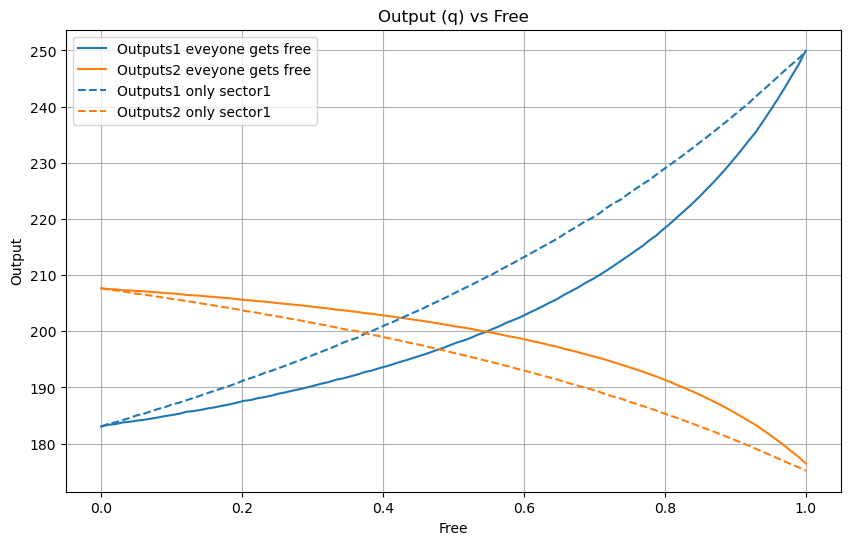

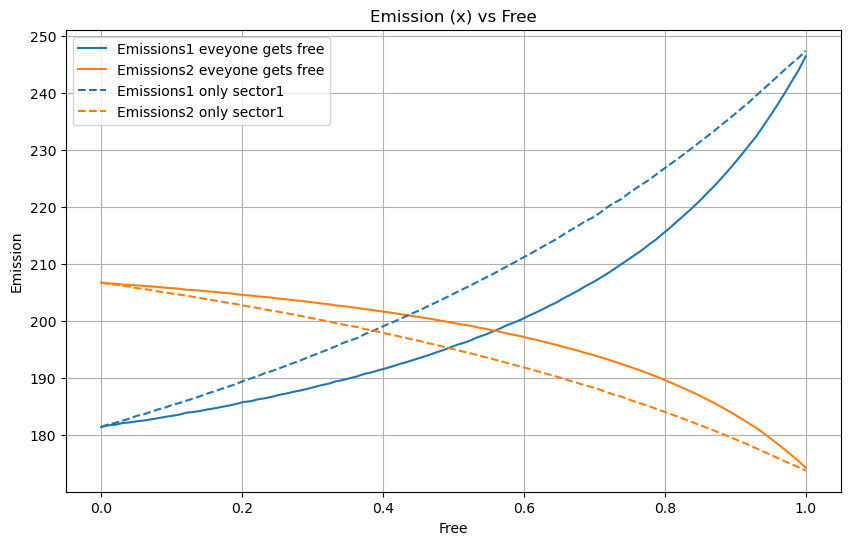

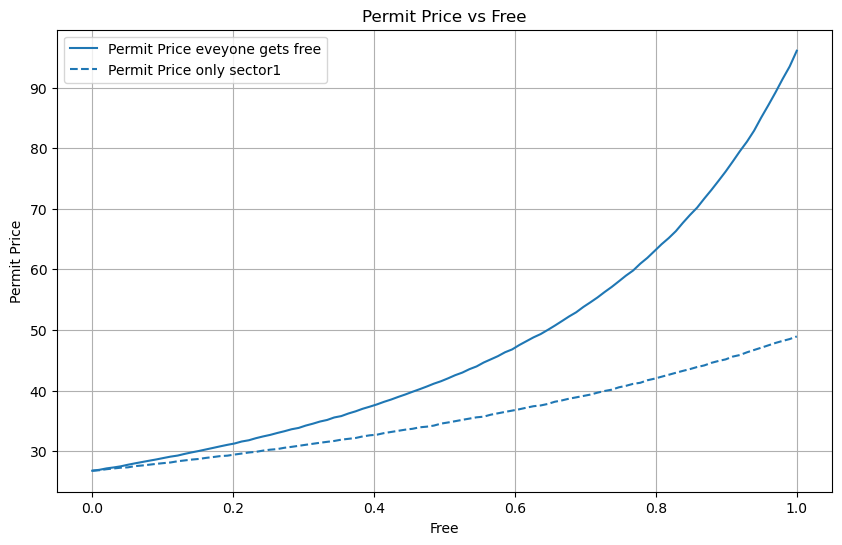

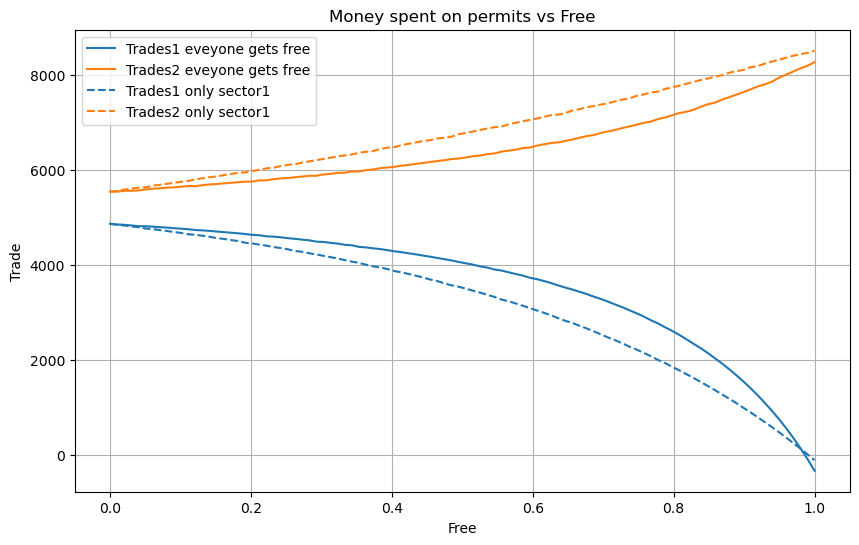

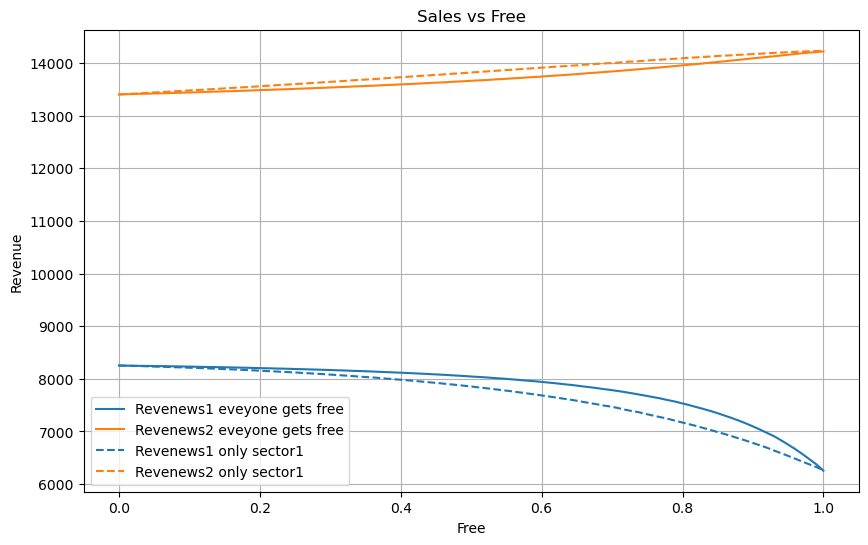

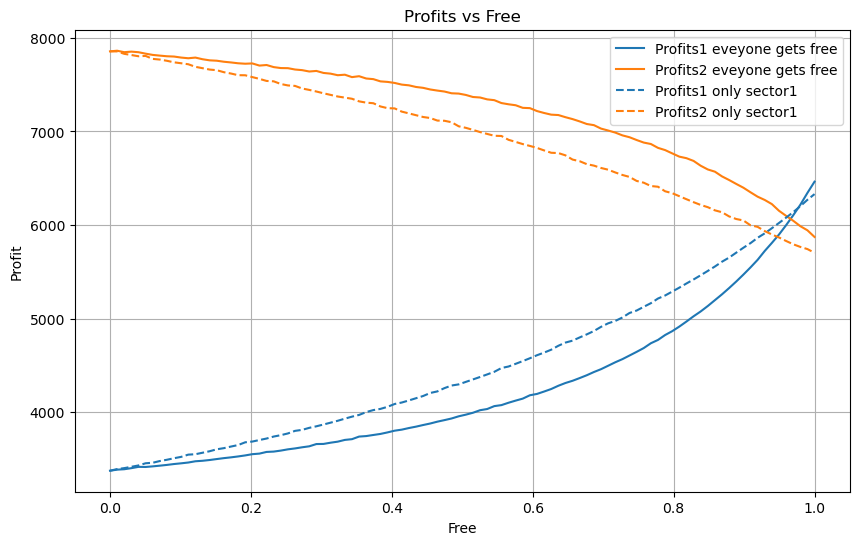

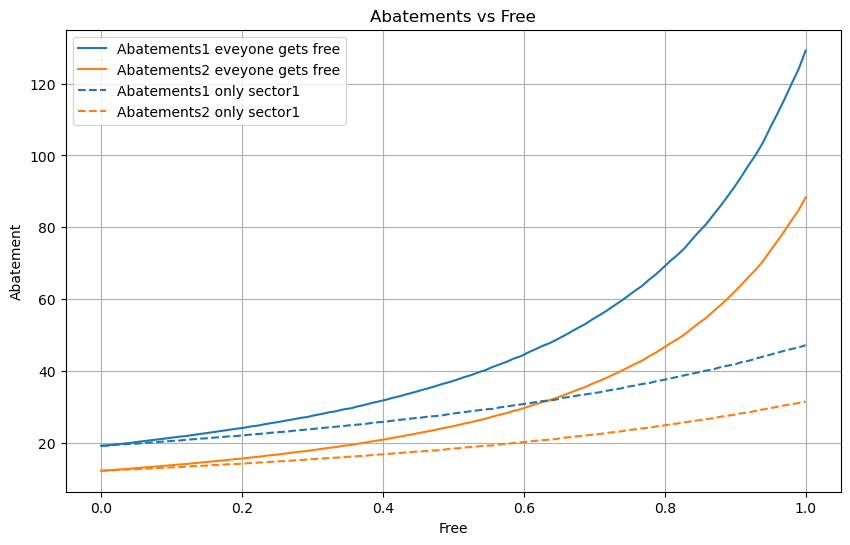

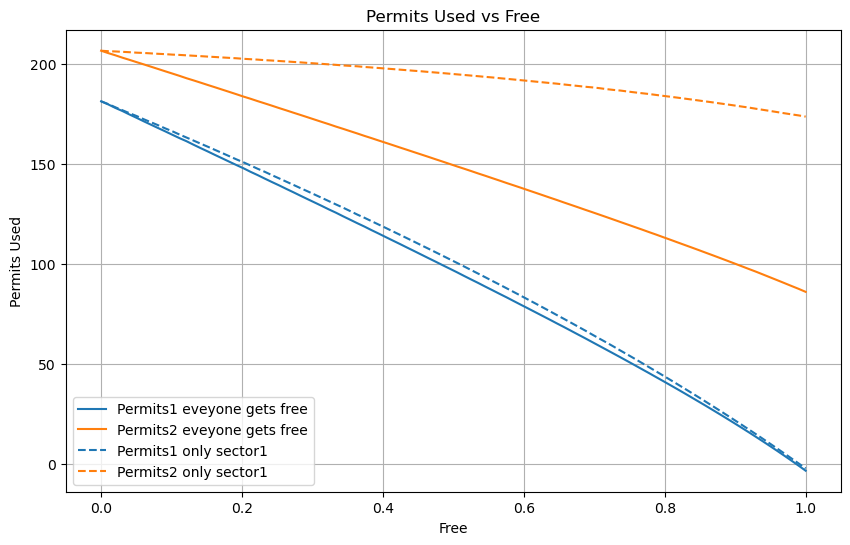

In [5]:
# Define colors and transparency levels
colors = {'trades1': '#1f77b4', 'trades2': '#ff7f0e'}


# Define a function to plot the metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.plot(frees, results[True][f'{metric}1'], label=f'{metric.capitalize()}1 eveyone gets free', color=colors['trades1'])
    plt.plot(frees, results[True][f'{metric}2'], label=f'{metric.capitalize()}2 eveyone gets free', color=colors['trades2'])
    plt.plot(frees, results[False][f'{metric}1'], label=f'{metric.capitalize()}1 only sector1', color=colors['trades1'], linestyle='--')
    plt.plot(frees, results[False][f'{metric}2'], label=f'{metric.capitalize()}2 only sector1', color=colors['trades2'], linestyle='--')
    plt.xlabel('Free')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot outputs
plot_metric('outputs', 'Output', 'Output (q) vs Free')

# Plot emissions
plot_metric('emissions', 'Emission', 'Emission (x) vs Free')

# Plot permit prices
plt.figure(figsize=(10, 6))
plt.plot(frees, results[True]['permit_price'], label=f'Permit Price eveyone gets free', color=colors['trades1'])
plt.plot(frees, results[False]['permit_price'], label=f'Permit Price only sector1', color=colors['trades1'], linestyle='--')
plt.xlabel('Free')
plt.ylabel('Permit Price')
plt.title('Permit Price vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot trades
plot_metric('trades', 'Trade', 'Money spent on permits vs Free')

# Plot revenues
plot_metric('revenews', 'Revenue', 'Sales vs Free')



# Plot profits
plot_metric('profits', 'Profit', 'Profits vs Free')

# Plot abatements
plot_metric('abatements', 'Abatement', 'Abatements vs Free')

# Plot permits used
plot_metric('permits', 'Permits Used', 'Permits Used vs Free')

